In [31]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import keras
from keras import layers
from keras.models import Sequential

### Dataset

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

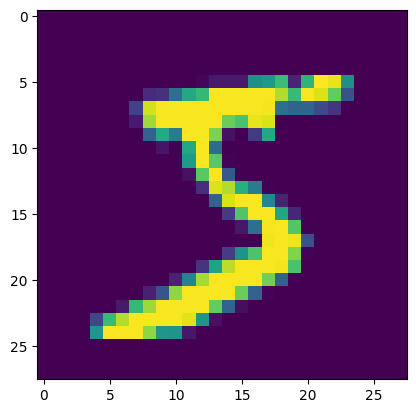

In [15]:
plt.imshow(x_train[0])

In [17]:
y_train[0]

5

In [18]:
#Converting images pixel values from 0-255 to 0-1
x_train=x_train/255
x_test=x_test/255
print(x_train,x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[[0. 0. 0

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [46]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

In [47]:
x_train.shape

(60000, 784)

In [48]:
x_test.shape

(10000, 784)

### Model

In [57]:
#initialize 3 layers input hidden and output layer
model=keras.Sequential([layers.Dense(100,input_shape=(784,)),layers.Dense(30,activation="relu"),layers.Dense(10,activation="softmax")])

In [58]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics='accuracy')

### Model Training

In [59]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3029 - accuracy: 0.9115
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1716 - accuracy: 0.9490
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1389 - accuracy: 0.9586
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1211 - accuracy: 0.9624
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9675
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0976 - accuracy: 0.9696
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0889 - accuracy: 0.9729
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0838 - accuracy: 0.9742
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0782 - accuracy: 0.9758
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.075

In [72]:
predicted_digits=model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [73]:
predicted_classes_digits=np.argmax(predicted_digits,axis=1)

### Model Evaluation

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [78]:
cm=confusion_matrix(y_test,predicted_classes_digits)

In [81]:
cm

array([[ 967,    0,    3,    1,    0,    2,    3,    3,    1,    0],
       [   0, 1117,    3,    4,    0,    0,    1,    1,    9,    0],
       [   1,    2,  990,   12,    4,    1,    4,    9,    8,    1],
       [   1,    0,    7,  990,    0,    2,    2,    3,    3,    2],
       [   1,    0,    9,    0,  944,    0,    9,    6,    0,   13],
       [   7,    0,    1,   36,    1,  825,    8,    2,   10,    2],
       [   4,    1,    4,    1,    1,    4,  940,    0,    3,    0],
       [   2,    3,   14,    8,    1,    0,    0,  985,    4,   11],
       [   5,    1,    7,   17,    9,    3,    5,    4,  921,    2],
       [   3,    3,    4,   13,   14,    7,    1,   13,    5,  946]])

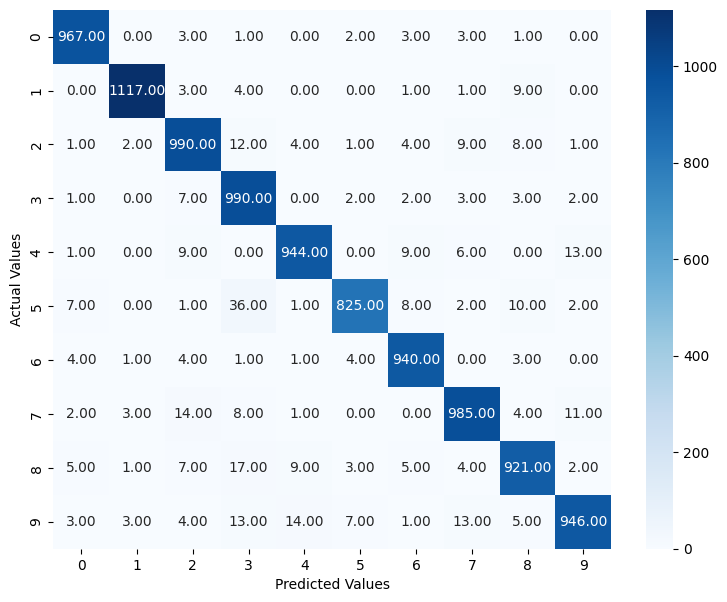

In [89]:
plt.figure(figsize=(9, 7))
sns.heatmap(cm,annot=True,fmt='.2f',cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [92]:
accuracy=np.mean(y_test==predicted_classes_digits)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 96.25%


### Save Model

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
model.save('/content/drive/MyDrive/digit_recognition_model')